In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Data Viz - open311 project/Open311.csv")
#last closed_data = 10/06/2023 02:48:28 PM

df.tail()

,service_request_id,requested_datetime,updated_datetime,closed_date,status_description,source,service_name,description,agency_responsible,address,city,state,zip,lat,long,Georeference,SLA Days
111173,185691,09/21/2023 12:37:49 PM,10/03/2023 11:41:35 AM,10/03/2023 11:41:35 AM,closed,Other,Recycling,This address has had recycling containers sitt...,HAND,316 E 8th ST,Bloomington,IN,47408.0,39.169304,-86.530327,POINT (-86.53032684 39.16930389),NaN
111174,185699,09/21/2023 04:17:49 PM,10/04/2023 12:02:17 PM,10/04/2023 12:02:17 PM,closed,Other,Biking & Walking,"This is a continuation of #185394, which was n...",Engineering,1100 N Walnut ST,Bloomington,IN,47404.0,39.177097,-86.533241,POINT (-86.53324127 39.17709732),NaN
111175,185683,09/21/2023 07:27:42 AM,10/05/2023 10:31:51 AM,10/05/2023 10:31:51 AM,closed,Other,City Performance,City workers replacing sidewalks on south side...,Mayor's Office,"Bloomington City Hall, 401 N Morton St, Bloomi...",Bloomington,IN,NaN,39.170132,-86.536926,POINT (-86.53692627 39.17013168),NaN
111176,185688,09/21/2023 12:35:35 PM,10/06/2023 12:35:18 PM,10/06/2023 12:35:18 PM,closed,Other,Recycling,This address has had recycling containers sitt...,HAND,416 N Grant ST,Bloomington,IN,47408.0,39.170189,-86.529556,POINT (-86.52955627 39.1701889),NaN
111177,185689,09/21/2023 12:36:28 PM,10/06/2023 02:48:29 PM,10/06/2023 02:48:28 PM,closed,Other,Recycling,This address has had recycling containers sitt...,HAND,323 N Grant ST,Bloomington,IN,47408.0,39.169392,-86.529945,POINT (-86.52994537 39.16939163),NaN


### EDA and pre-processing

In [4]:
df.describe()

,service_request_id,zip,lat,long,SLA Days
count,111178.000000,81377.000000,89019.000000,89021.000000,58850.000000
mean,112865.552375,47403.405483,39.141497,-86.477485,8.547511
std,45267.502954,2.762006,1.021884,2.419674,1.436245
min,470.000000,47401.000000,-38.710426,-123.393730,2.000000
25%,83943.250000,47401.000000,39.150852,-86.538818,9.000000
50%,112350.500000,47403.000000,39.161327,-86.529320,9.000000
75%,150166.500000,47404.000000,39.170052,-86.513947,9.000000
max,186405.000000,47460.000000,51.433235,139.737640,9.000000


In [5]:
df.isnull().sum()

service_request_id        0
requested_datetime        0
updated_datetime          0
closed_date             572
status_description        0
source                34312
service_name              0
description            9018
agency_responsible    68062
address                9791
city                     53
state                    53
zip                   29801
lat                   22159
long                  22157
Georeference          22159
SLA Days              52328
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111178 entries, 0 to 111177
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   service_request_id  111178 non-null  int64  
 1   requested_datetime  111178 non-null  object 
 2   updated_datetime    111178 non-null  object 
 3   closed_date         110606 non-null  object 
 4   status_description  111178 non-null  object 
 5   source              76866 non-null   object 
 6   service_name        111178 non-null  object 
 7   description         102160 non-null  object 
 8   agency_responsible  43116 non-null   object 
 9   address             101387 non-null  object 
 10  city                111125 non-null  object 
 11  state               111125 non-null  object 
 12  zip                 81377 non-null   float64
 13  lat                 89019 non-null   float64
 14  long                89021 non-null   float64
 15  Georeference        89019 non-null

In [7]:
df.select_dtypes(include=['object']).nunique()

requested_datetime    51025
updated_datetime      26864
closed_date           51063
status_description        2
source                   13
service_name             70
description           64476
agency_responsible       32
address               28441
city                      2
state                     1
Georeference          30447
dtype: int64

In [8]:
df2 = df.copy(deep = True)

In [9]:
#remove service_request_id
#df2 = df2.drop('service_request_id', axis=1, inplace=True)

#removing city and state
df2 = df.drop(columns=['city','state'])

#replace requested_datetime, updated_datetime and closed_date with response time (in days)
df2['response_time'] = (pd.to_datetime(df['closed_date']) - pd.to_datetime(df['requested_datetime'])).dt.total_seconds() / (24 * 60 * 60)
#df2.drop(['requested_datetime', 'updated_datetime', 'closed_date'], axis=1, inplace=True)

In [10]:
#here as you see, ZIP is in float, but ideally it should be a categorical column
df2['zip'] = df2['zip'].astype('object')

In [ ]:
#conversion of requested_datatime datatype
df2['requested_datetime'] = pd.to_datetime(df2['requested_datetime'])

# Extract the year from 'requested_datetime'
df2['year'] = df2['requested_datetime'].dt.year

# Create a DataFrame with null values for the specified columns and total count
result_df = pd.DataFrame()

# Extracting unique years
years = df2['year'].unique()

for year in years:
    # Filter data for the current year
    year_data = df2[df2['year'] == year]

    # Count of null values for 'source' and 'agency_responsible'
    null_count_source = year_data['source'].isna().sum()
    null_count_agency = year_data['agency_responsible'].isna().sum()
    null_count_service = year_data['service_name'].isna().sum()

    # Total count of 'service_request_id'
    total_count = year_data['service_request_id'].count()

    # Append a row to the result DataFrame
    result_df = result_df.append({
        'Year': year,
        'NullCount_Source': null_count_source,
        'NullCount_Agency': null_count_agency,
        'NullService_Name': null_count_service,
        'Total_Complaints': total_count
    }, ignore_index=True)

# Set 'Year' column as index
result_df.set_index('Year', inplace=True)

# Print the result DataFrame
#print(result_df)

In [12]:
result_df = result_df.sort_values(by='Year')
print(result_df)

      NullCount_Source  NullCount_Agency  NullService_Name  Total_Complaints
Year                                                                        
1970                 0               205                 0               205
1980                 0                 1                 0                 1
1990                 0                 1                 0                 1
1994                 2                 2                 0                 2
1995               672               682                 0               683
1996              1272              1290                 0              1290
1997               927              4063                 0              4063
1998                 1              4742                 0              4743
1999                 1              3887                 0              3887
2000                 1              3258                 0              3258
2001                 0              4651                 0              4652

In [13]:
df_14_23 = df2[(df2['year'] >= 2014) & (df2['year'] <= 2023)]
df_14_23.head()
df_14_23.shape

# Save the selected dataset to a CSV file
#df_14_23.to_csv('open311_14to23.csv', index=False)

(35657, 17)

In [14]:
#checking value counts of all columns in df_14_23

'''
column_value_counts = {}

for column in df_14_23.columns:
    column_value_counts[column] = df_14_23[column].value_counts()

for column, counts in column_value_counts.items():
    print(f"Counts for {column}:")
    print(counts)
    print()
'''

'\ncolumn_value_counts = {}\n\nfor column in df_14_23.columns:\n    column_value_counts[column] = df_14_23[column].value_counts()\n\nfor column, counts in column_value_counts.items():\n    print(f"Counts for {column}:")\n    print(counts)\n    print()\n'

In [15]:
#trying to see if we can substiute null values in agency with the help of service_name

#finding the most common agency_responsible to a service_name
mode_agency = df_14_23.groupby('service_name')['agency_responsible'].apply(lambda x: x.mode().iloc[0])

#using the above groupby to replace empty values in agency_responsible
df_14_23['agency_responsible'] = df_14_23.apply(
    lambda row: mode_agency[row['service_name']] if pd.isna(row['agency_responsible']) else row['agency_responsible'],
    axis=1
)

#df_14_23['agency_responsible'].isna().sum()

<ipython-input-15-17638b4d5cc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14_23['agency_responsible'] = df_14_23.apply(


In [16]:
df_14_23.isna().sum()

service_request_id        0
requested_datetime        0
updated_datetime          0
closed_date             572
status_description        0
source                 5636
service_name              0
description            3741
agency_responsible        0
address                8449
zip                   15944
lat                    8701
long                   8699
Georeference           8701
SLA Days              23104
response_time           572
year                      0
dtype: int64

In [67]:
df_14_23_btown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26353 entries, 77 to 111177
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   service_request_id  26353 non-null  int64         
 1   requested_datetime  26353 non-null  datetime64[ns]
 2   updated_datetime    26353 non-null  object        
 3   closed_date         25977 non-null  object        
 4   status_description  26353 non-null  object        
 5   source              21041 non-null  object        
 6   service_name        26353 non-null  object        
 7   description         22859 non-null  object        
 8   agency_responsible  26353 non-null  object        
 9   address             25963 non-null  object        
 10  zip                 26353 non-null  object        
 11  lat                 26353 non-null  float64       
 12  long                26353 non-null  float64       
 13  Georeference        26353 non-null  object  

## Geographical maps

In [17]:
df_14_23 = df_14_23.dropna(subset=['lat', 'long'])
df_14_23.shape

(26956, 17)

In [18]:
!pip install python-dotenv

In [19]:
#some geolocations are beyond bloomington, removing those locations
import os
from dotenv import load_dotenv
import requests

# Set the path to the .env file in your Google Drive
env_path = '/content/drive/MyDrive/Data Viz - open311 project/.env'
load_dotenv(env_path)

api_key = os.getenv('API_KEY')
city_name = 'Bloomington'

url = f'https://api.opencagedata.com/geocode/v1/json?q={city_name}&key={api_key}'

response = requests.get(url)
data = response.json()

# Extract bounding box coordinates
southwest = data['results'][0]['bounds']['southwest']
northeast = data['results'][0]['bounds']['northeast']

print('Latitude Range:', southwest['lat'], 'to', northeast['lat'])
print('Longitude Range:', southwest['lng'], 'to', northeast['lng'])

Latitude Range: 39.1213291 to 39.2213618
Longitude Range: -86.5918944 to -86.4711305


In [20]:
# Filter DataFrame based on the bounding box
df_14_23_btown = df_14_23[
    (df_14_23['lat'] >= southwest['lat']) & (df_14_23['lat'] <= northeast['lat']) &
    (df_14_23['long'] >= -86.5918944) & (df_14_23['long'] <= -86.4711305)
]

# Display the resulting DataFrame
df_14_23_btown.shape

(26353, 17)

In [21]:
#https://python-charts.com/spatial/interactive-maps-folium/
import folium

map_points = folium.Map(location = [39.1653, -86.5264], zoom_start = 12)

for index, row in df_14_23_btown.iterrows():
   folium.Circle(location=[row['lat'], row['long']], color='red').add_to(map_points)

map_points
map_points.save('map_points.html')

In [22]:
#!pip install mplleaflet

In [23]:
'''
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet

df_14_23.plot()

#https://stackoverflow.com/questions/74365214/xaxis-object-has-no-attribute-gridonmajor
#I changed the file utils.py (/usr/local/lib/python3.10/dist-packages/mplleaflet/mplexporter/utils.py) in the mplleaflet files in my environment. I simply replaced axis._gridOnMajor with axis._major_tick_kw['gridOn'].
mplleaflet.show()

ax = df_14_23['Georeference'].plot(markersize = 50, color = "red")

mplleaflet.display(fig=ax.figure, crs=df_14_23['Georeference'].crs)
'''

'\nimport geopandas as gpd\nimport matplotlib.pyplot as plt\nimport mplleaflet\n\ndf_14_23.plot()\n\n#https://stackoverflow.com/questions/74365214/xaxis-object-has-no-attribute-gridonmajor\n#I changed the file utils.py (/usr/local/lib/python3.10/dist-packages/mplleaflet/mplexporter/utils.py) in the mplleaflet files in my environment. I simply replaced axis._gridOnMajor with axis._major_tick_kw[\'gridOn\'].\nmplleaflet.show()\n\nax = df_14_23[\'Georeference\'].plot(markersize = 50, color = "red")\n\nmplleaflet.display(fig=ax.figure, crs=df_14_23[\'Georeference\'].crs)\n'

In [24]:
from folium.plugins import MarkerCluster

map_clusters = folium.Map(location = [39.1653, -86.5264], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map_clusters)

for index, row in df_14_23_btown.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

map_clusters
#map_clusters.save('map_clusters.html')

Output hidden; open in https://colab.research.google.com to view.

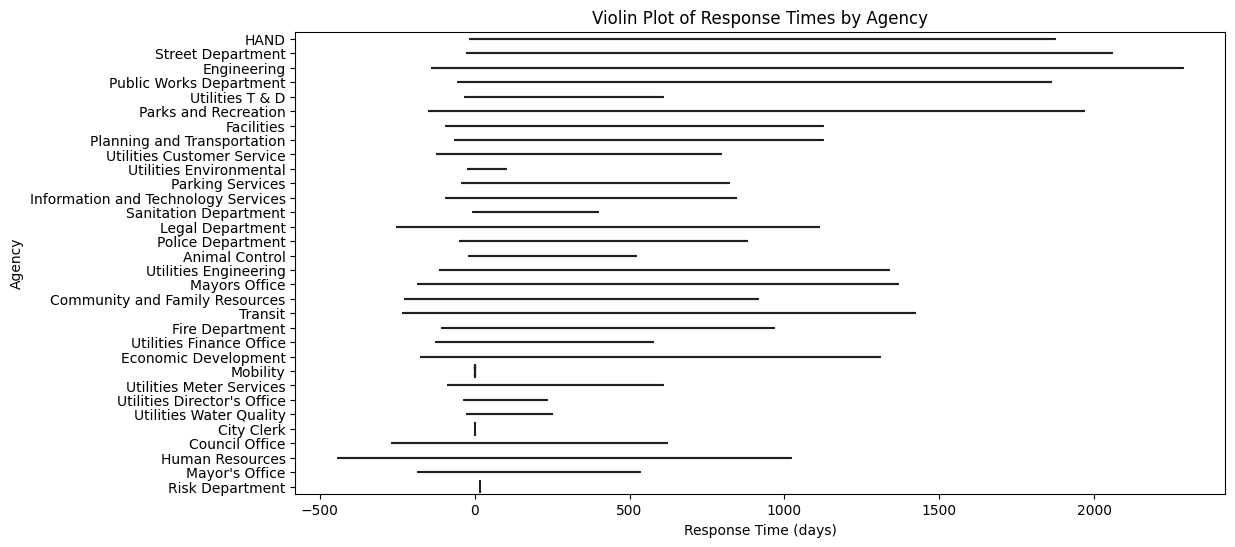

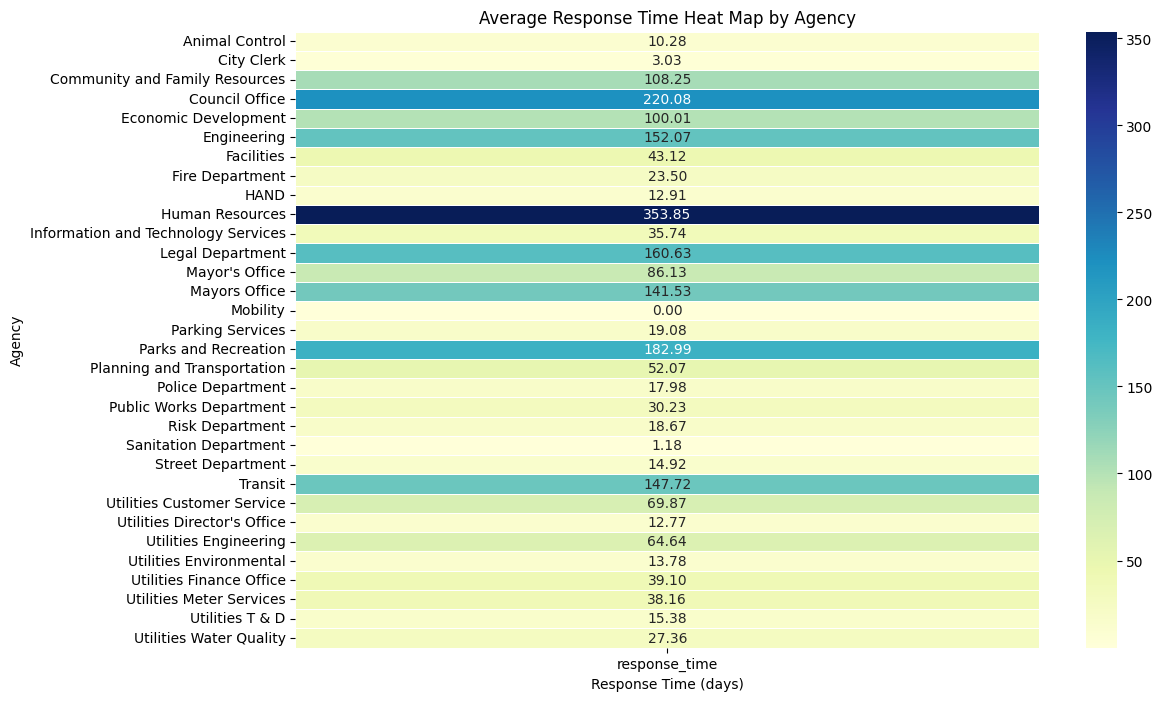

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df_14_23_btown['response_time'], y=df_14_23_btown['agency_responsible'], inner='quartile', palette='viridis')
plt.title('Violin Plot of Response Times by Agency')
plt.xlabel('Response Time (days)')
plt.ylabel('Agency')
plt.show()

# Heat Map
pivot_df = df_14_23_btown.pivot_table(values='response_time', index='agency_responsible', aggfunc='mean').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Response Time Heat Map by Agency')
plt.xlabel('Response Time (days)')
plt.ylabel('Agency')
plt.show()

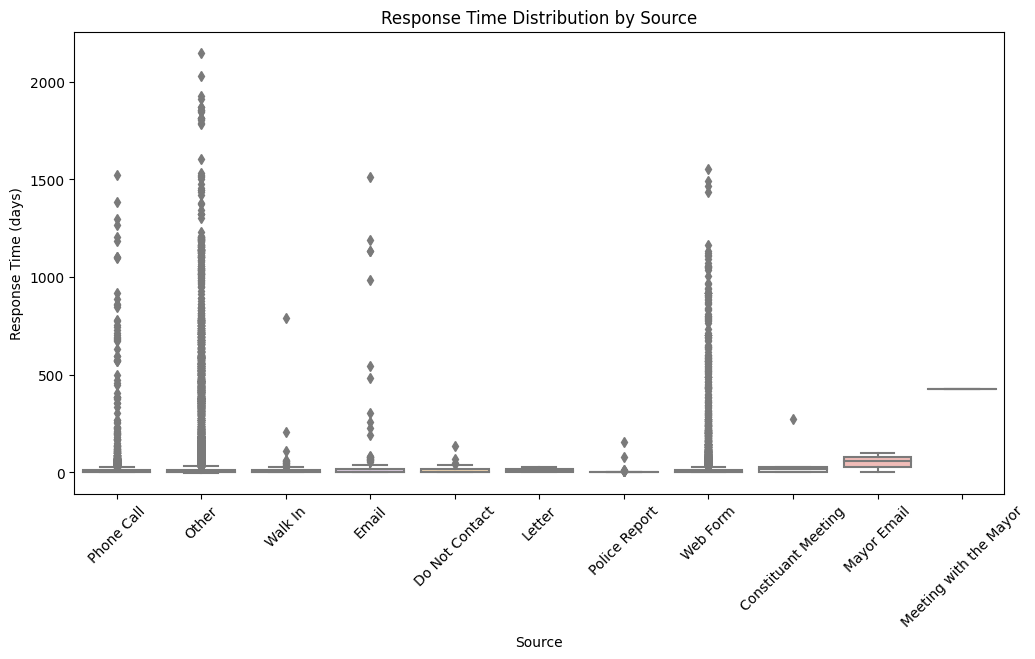

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='response_time', data=df_14_23_btown, palette='Pastel1')
plt.title('Response Time Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Response Time (days)')
plt.xticks(rotation=45)
plt.show()

In [27]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.4 MB/s eta 0:00:00


In [28]:
df_14_23_btown.to_csv('df_14_23_btown.csv')

In [29]:
df_14_23_btown['agency_responsible'].isna().sum()

0

In [38]:
import plotly.graph_objects as go

# Create a scatter plot on a geographic map
fig = go.Figure(data=[go.Scattergeo(lat=df_14_23_btown['lat'].tolist(), lon=df_14_23_btown['long'].tolist())])

# Add a title and axis labels
fig.update_layout(title='Location requests',
                  xaxis_title='Longitude',
                  yaxis_title='Latitude')


fig.update_layout(
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True
        ))

lat_foc = 39.1653
lon_foc = -86.5264
fig.update_layout(
        geo = dict(
            projection_scale=200, #this is kind of like zoom
            center=dict(lat=lat_foc, lon=lon_foc), # this will center on the point
        ))

# Show the plot
fig.show()

In [40]:
import json
import pandas as pd
import plotly.express as px
import requests

url = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/in_indiana_zip_codes_geo.min.json'
response = requests.get(url)
in_zip_json = response.json()

#df_14_23_btown = pd.read_csv('open311_14to23.csv')

# Convert ZIP codes to strings and format them correctly (remove the decimal point)
df_14_23_btown['zip'] = df_14_23_btown['zip'].astype(str).str.split('.').str[0]

# Filter out invalid ZIP codes (e.g., 'nan')
zip_counts = df_14_23_btown['zip'].value_counts().reset_index()
zip_counts.columns = ['zip', 'count']
zip_counts = zip_counts[zip_counts['zip'] != 'nan']

# Create the choropleth map
fig = px.choropleth(zip_counts,
                    geojson=in_zip_json,
                    locations='zip',
                    featureidkey="properties.ZCTA5CE10",
                    color='count',
                    color_continuous_scale="blues",
                    projection="mercator"
                   )

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Update layout with title and labels
fig.update_layout(
    title={
        'text': "Distribution of Service Requests by ZIP Code in Bloomington",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin={"r":0,"t":30,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Number of Requests"
    )
)

fig.write_html("service_requests_by_zip_code.html")
# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [43]:
import pandas as pd
import plotly.express as px

# Assuming df_14_23_btown is your DataFrame
# Replace 'zipcode' with the actual column name in your dataset
zipcode_column = 'zip'

# Aggregate the count of service requests by ZIP code
zipcode_counts = df_14_23_btown[zipcode_column].value_counts().reset_index()
zipcode_counts.columns = ['ZIP Code', 'Request Count']

# Create a bar graph
fig_bar = px.bar(
    zipcode_counts,
    x='ZIP Code',
    y='Request Count',
    title='Distribution of Service Requests by ZIP Code in Bloomington',
    labels={'ZIP Code': 'ZIP Code', 'Request Count': 'Number of Requests'}
)

# Show the bar graph
fig_bar.show()


In [50]:
import pandas as pd
import plotly.express as px
from plotly.offline import plot

# Assuming df_14_23_btown is your DataFrame
# Replace 'zipcode' with the actual column name in your dataset
zipcode_column = 'zip'

# Aggregate the count of service requests by ZIP code
zipcode_counts = df_14_23_btown[zipcode_column].value_counts().reset_index()
zipcode_counts.columns = ['ZIP Code', 'Request Count']

# Create a bubble map
fig_bubble = px.scatter_geo(
    zipcode_counts,
    locationmode='USA-states',
    locations='ZIP Code',
    size='Request Count',
    title='Distribution of Service Requests by ZIP Code in Bloomington',
    labels={'ZIP Code': 'ZIP Code', 'Request Count': 'Number of Requests'},
    size_max=50,  # Adjust the max size of bubbles as needed
    projection='natural earth'
)

# Set the map scope to USA
fig_bubble.update_geos(scope="usa")

# Save the figure as an HTML file
html_file_path = 'bubble_map.html'
plot(fig_bubble, filename=html_file_path, auto_open=False)

# Display the HTML file
html_file_path


'bubble_map.html'

In [62]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df_14_23_btown is your DataFrame
# Replace 'lat', 'long', 'agency_responsible' with the actual column names in your dataset
lat_column = 'lat'
long_column = 'long'
agency_column = 'agency_responsible'

# List of specific agency names
selected_agencies = [
    "Utilities Director's Office",
    'Utilities Customer Service',
    'Transit',
    'Sanitation Department',
    'HAND',
    "Mayor's Office",
    'Fire Department',
    'Utilities Environmental',
    'Council Office',
    'Mayors Office',
    'Community and Family Resources',
    'Information and Technology Services',
    'Utilities Meter Services',
    'Utilities Engineering',
    'Risk Department',
    'Utilities Finance Office',
    'Public Works Department',
    'Human Resources',
    'Animal Control',
    'Economic Development',
    'Mobility',
    'Police Department',
    'Parking Services',
    'Planning and Transportation',
    'City Clerk',
    'Utilities Water Quality',
    'Legal Department',
    'Engineering',
    'Street Department',
    'Utilities T & D',
    'Facilities',
    'Parks and Recreation'
]

# Filter DataFrame for selected agencies
selected_agency_data = df_14_23_btown[df_14_23_btown[agency_column].isin(selected_agencies)]

# Create separate plots for each agency
for agency in selected_agencies:
    agency_data = selected_agency_data[selected_agency_data[agency_column] == agency]

    # Create a scatter plot for each agency
    scatter = go.Scattergeo(
        lat=agency_data[lat_column],
        lon=agency_data[long_column],
        mode='markers',
        marker=dict(size=8),
        name=agency
    )


    # Create layout
    layout = go.Layout(
        geo=dict(projection_type='natural earth', showland=True, landcolor="lightgray"),
        title=f'Service Location Points - {agency}',
        showlegend=True
    )

    lat_foc = 39.1653
    lon_foc = -86.5264
    fig.update_layout(
    geo = dict(
            projection_scale=200, #this is kind of like zoom
            center=dict(lat=lat_foc, lon=lon_foc), # this will center on the point
        ))

    # Create figure
    fig = go.Figure(data=[scatter], layout=layout)

    # Show the plot
    fig.show()


In [54]:
list(set(df_14_23_btown['agency_responsible'].to_list()))

["Utilities Director's Office",
 'Utilities Customer Service',
 'Transit',
 'Sanitation Department',
 'HAND',
 "Mayor's Office",
 'Fire Department',
 'Utilities Environmental',
 'Council Office',
 'Mayors Office',
 'Community and Family Resources',
 'Information and Technology Services',
 'Utilities Meter Services',
 'Utilities Engineering',
 'Risk Department',
 'Utilities Finance Office',
 'Public Works Department',
 'Human Resources',
 'Animal Control',
 'Economic Development',
 'Mobility',
 'Police Department',
 'Parking Services',
 'Planning and Transportation',
 'City Clerk',
 'Utilities Water Quality',
 'Legal Department',
 'Engineering',
 'Street Department',
 'Utilities T & D',
 'Facilities',
 'Parks and Recreation']